
<h1><b>Statistique en Bioinformatique : </b> TME1 </h1>
<br>
L’objectif de ce TME est l’analyse statistique d’une famille de protéines à travers son alignement de séquences:
<br>
<ul>
<li> objectif 1: détection des positions conservées, </li>
<li> objectif 2: détection de séquences qui appartiennent à la même famille, </li>
</ul>
<vr>
<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**Soumission**</p>
<ul>
<li>Renommer le fichier TME1.ipynb pour NomEtudiant1_NomEtudiant2.ipynb </li>
<li>Soumettre via Moodle avant le prochain TME
</ul>
<br>
REMARQUE : Les fichiers seront aussi corrigés numériquement. Faites donc attention à <b> ne pas modifier la signature et le renvoi des fonctions! </b>
<br>
</div>

Nom etudiant 1 :
<br> Alexis Trang <br>
Nom etudiant 2 :
<br> Yann Zhong

<b>DONNÉES</b> <br>
Il y a 2 fichiers avec les données telecharché à (<a href="http://www.lcqb.upmc.fr/julianab/teaching/SBAS/TME1.tar.gz"> TME1 </a> ): <br>
<ul>
<li> Dtrain.txt: C’est un alignement de M = 5643 protéines d’une seule famille en format FASTA,
<br>
    Les lignes qui commencent avec “>” contiennent des commentaires (nom de la protéine etc.). Elles n’ont aucune importance pour notre projet. Les autres lignes contiennent les séquences, que l’on va utiliser dans le projet. Les séquences sont alignées, elles ont toutes la même longueur (L = 48 positions dans notre fichier). Chaque position i = 0, ..., L − 1 d'une séquence contient soit un acide aminé (A,C,...,Y, il y en a 20) ou un trou (–), que l'on considère comme 21ème lettre. Ensemble elles forment l'alphabet: 
    A =  {A, C, D, E, F, G, H, I, K, L, M, N, P, Q, R, S, T, V, W, Y, -}, avec q = 21 lettres différentes.
</li>
    <br>
<li> testseq.txt:  testseq.txt: Même format de Dtrain.txt, mais avec une seule séquence b = (b0 , ..., bN −1 ) plus longue (longueur N = 114 > L). On va scanner cette séquence pour trouver une sous-séquence qui appartient à la famille definie par Dtrain.txt. </li>
</ul>

Exercice 1: Pour chaque position i = 0, ..., L − 1 de l' alignement et chaque acide aminé a ∈ A (trou compris), calculer le nombre d’occurences ni(a) et le poid ωi(a), où :
\begin{equation*}
n_{i}(a) = \textrm{nombre d'occurrences de l'acide aminé a dans la colonne i}
\end{equation*}

\begin{equation*}
\omega_i(a) = \frac{n_i(a)+1}{M+q}\ .
\end{equation*}

In [5]:
import sys
import numpy as np
import math
aa = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', '-']
q = 21
#aa = ['A', 'B', 'C', '-']
#q = 4
#aa = ['A', 'G', 'C', 'T', '-']
#q = 5

In [6]:
#load path Files
input_dataset_f = 'Dtrain.txt'
input_sequence_f = 'test_seq.txt'
#input_dataset_f = 'DtrainToy.txt'
#input_sequence_f = 'test_seqToy.txt'
#input_dataset_f = 'DtrainToyTD.txt'

In [7]:
#load DTrain File
def load_train(input_f):
    """Input 1 : a multiple sequence alignment (MSA) in FASTA format
    Output 1 : the MSA (see REMARK)
    Output 2 : the length of the aligned sequences (MSA length)
    Output 3 : the number of sequences in the MSA (MSA depth)
    
    REMARK : The MSA should be represented as an ordered collection of sequences.
    Meaning, the first sequence in the file must be the first sequence in the
    data structure. You can represent it as a list of lists of char, a list of 
    str, a numpy matrix, etc. Just be consistent throughout the whole TME1"""
    
    train_set = [] # the MSA
    L = 0          # the length of the aligned sequences
    m = 0          # the number of sequences in the MSA
    
    file = open(input_f, 'r') # r is for read
    
    n = 1 # odd/even line counter
    
    for i in file:                 # Ignore all odd lines, only take even lines
        if n == 2:
            train_set.append(i[:-1]) # Removing the last character removes the \n.
            n = 1
        else: 
            n = 2 
    file.close()
    
    L = len(train_set[0]) # all have the same length
    m = len(train_set)
    
    # print(train_set) # for checking purposes
    
    return train_set, L, m

train_set, L, m = load_train(input_dataset_f)
test_set, Ltest, mtest = load_train(input_sequence_f)
print("Training data (watch out, this is long):")
print(train_set)

print("MSA length", L)
print("MSA depth", m)

Training data (watch out, this is long):
['-ALYDCEAENSDELTFNRGEIIQLIDRPDNDWWEGFIQSDSRRGMFPV', 'KAIYNCSADHPDELTFSEGEVLVVDGEEDSDWWFGHVENESRRGVFPV', 'KALYNCVADNADELTFSEGEMIIVDGEEDKEWWVGHIDGETRRGVFPV', 'KALYNCVADNADELTFSEGEMIIVDGEEDKEWWVGHIDGETRRGVFPV', 'KAVYNCVADNPDELTFAEGEVIVVDGEEDQEWWVAGPHRR--------', 'KAVYNCVADNPDELTFAEGEVIVVDGEEDQEWWVAGPHRR--------', 'KALYNCLADNPDELTFTEGEVIVVDGEEDQEWWKGHIEGDTRRGVFPT', 'KALYNCVADNPDELTFSEGDVIIVDGEEDQEWWIGHIDGDGRKGAFPV', 'KALYNCVADNPDELTFSEGDVIIVDGEEDQEWWIGHIDGDGRKGAFPV', 'KALYNCVADNPDELTFSEGDVIIVDGEEDQEWWIGHIDGDGRKGAFPV', 'KALYNCVADNPDELTLSEGDVIIVDGEEDQEWWIGHIDGESRKGAFPV', 'KALYNCVADNPDELTFSEGDVIIVDGEEDQEWWIGHIDGESRKGAFPV', 'KALYNCVADNPDELTFSEGDVIIVDGEEDQEWWIGHIDGESRKGAFPV', 'KALYNCVADNPDELTFSEGDVIIVDGEEDQEWWIGHIDGESRKGAFPV', 'KAIYHCSADNPDELTFSEGEIIVVDGEEDKEWWIGHIDGENRRGAFPV', '-TIYDCQADNDDELTFMEGEVIVVTGEEDQEWWIGHIEGQERKGVFPV', '-TIYDCQADNDDELTFVEGEVIIVTGEEDQEWWIGHIEGQERKGVFP-', '-TIYDCQADNDDELTFVEGEVIIVTGEEDQEWWIGHIEGQERKGVFP-', '-TIYDCQADNDDELTFIEGEV

In [8]:
#Computing wi(a)
def get_pwm(train_set, L, m, alphabet):
    
    """
    Input 1 : The MSA (see REMARK of the load_train function)
    Input 2 : the MSA length
    Input 3 : the MSA depth
    Input 4 : the alphabet used (it must be an ordered collection of non-repeating characters)
    Output 1 : position-weight matrix of shape (q, L) where q is len(alphabet)
    """
    
    PWM=np.zeros((q,L))
    
    for i in range(L):
        colonnei=[]
        for j in range(m):
            colonnei.append(train_set[j][i])
        for k in range(q):

            PWM[k][i]=(colonnei.count(alphabet[k])+1)/(m+q)
    return PWM
    
PWM = get_pwm(train_set, L, m, aa) # q is defined as 21 earlier, aa is simply the whole alphabet
print(PWM)

[[1.76553672e-04 7.25282486e-01 1.02401130e-02 ... 3.42514124e-02
  1.76553672e-04 2.38170904e-01]
 [1.76553672e-04 1.76553672e-04 1.94209040e-03 ... 7.59180791e-03
  1.76553672e-04 1.69491525e-02]
 [1.76553672e-04 1.76553672e-04 3.53107345e-04 ... 1.76553672e-04
  1.76553672e-04 1.76553672e-04]
 ...
 [1.76553672e-04 1.76553672e-04 1.76553672e-04 ... 1.76553672e-04
  1.76553672e-04 1.76553672e-04]
 [1.76553672e-04 1.76553672e-04 1.76553672e-04 ... 1.78319209e-02
  1.76553672e-04 1.76553672e-04]
 [3.13206215e-01 1.55367232e-01 8.20974576e-02 ... 5.66737288e-02
  6.77966102e-02 3.53460452e-01]]


Exercise 2: Trouvez les positions les plus conservées en utilisant l’entropie relative.
<br>
2.1) Pour chaque position i = 0, ..., L − 1, determiner l’entropie relative Si<br>
\begin{equation*}
\label{eq:entropie}
S_i = \log_2(q) + \sum_{a\in {\cal A}} \omega_i(a)\cdot \log_2\left[\omega_i(a) \right]\ .
\end{equation*}
<br>


In [9]:
#Computing Si
def si_calculate (wi):  # takes one vector representing one entire column of the MSA aka, that same position for every sequence 
    """
    Input 1 : Weight vector (of length q) representing column i of the MSA
    Output 1 : Relative entropy of column i
    """
    
    si = 0
    si += math.log(q,2) # base 2 log of q, which is 21
    
    for i in range(len(wi)):
        si += wi[i] * math.log(wi[i],2)
    
    return si # returns the entropy value of that particular position (exemple 0th position)

# print(si_calculate(PWM[:,0])) # entropy value of the first column, for testing purposes

#Make a vector Si of length L containing the relative entropy of each position (column) of the MSA

Si = []
for i in range(L):
    Si.append(si_calculate(PWM[:,i]))
    
print(Si)
print(len(Si))

print(Si[31])
print(Si[46])
print(Si[43])

[1.8547663336943545, 3.180777920885485, 2.053193822937085, 2.5356831509253626, 1.9140965960418481, 2.8215736135814895, 0.7342497362887069, 1.9941697936889031, 0.7911537784490944, 0.6202211018123743, 1.1826498644120484, 1.4543422165059237, 2.808631677055902, 3.168555723946191, 1.607296553783055, 2.514404965542195, 0.810701246420586, 1.3996461274828191, 3.2208097503024034, 2.4542908790491156, 1.0463314843282085, 2.2925291225114197, 0.5994283066125721, 2.291423220954082, 1.5935699638823888, 1.0669572914365597, 0.7915295920400254, 0.5456591354603471, 1.1618827719052378, 1.0214495913204356, 1.7623537809693235, 4.176827384837058, 1.9604524394188956, 0.7790672675382985, 2.577180292047913, 1.0585203618533976, 0.6361714675326157, 0.454715779516762, 1.1572928388375066, 2.3726424080109223, 2.2210870502566453, 0.8314607366842663, 0.7787626203889969, 3.8755139641349117, 1.284622650045173, 2.2055299138293325, 3.986272830157267, 2.0581653986603854]
48
4.176827384837058
3.986272830157267
3.87551396413

2.2) Indiquez les acides aminees (ai*) des trois positions les plus conservées : 
\begin{equation}
\label{eq:conserved}
a_i^\star = {\rm argmax}_{a\in {\cal A}} \omega_i(a)\ .
\end{equation}

In [10]:
#computing ai*
def get_aiStart(Si, PWM, naa, alphabet):
    """
    Input 1 : Relative entropy vector of length L
    Input 2 : position-weight matrix of shape (q, L)
    Input 3 : 0 < int < q+1, specifying the number of top-conserved residues
    Output 1 : list of length naa containing the amino acid type (char) of the 
    top-naa conserved columns
    """
    
    # Method: find argmin and remove argmin position, then replace that value with 0
    # Do this three times
    
    min_ent = [0,0,0]
    pop = [0,0,0]
    
    for i in range(naa):
        min_ent[i] = np.argmin(Si)
        pop[i] = Si[np.argmin(Si)]
        Si[np.argmin(Si)] = max(Si)  # replace with max value
    
    # Once this is done, put the min 3 values back in as to not cause problems for subsequent runs:
    for j in range(len(pop)):
        Si[min_ent[j]] = pop[j]
    
    # Once we find the top three minimum entropies, we then look for the argmax on the corresponding position
    # to get the AA most likely responsible for this entropy
    return [alphabet[np.argmax(PWM[:,a])] for a in min_ent], min_ent

print(get_aiStart(Si, PWM, 3, aa))

(['N', 'S', 'T'], [37, 27, 22])


In [11]:
import matplotlib.pyplot as plt

2.3) Tracer l’entropie rélative en fonction de chaque position i.

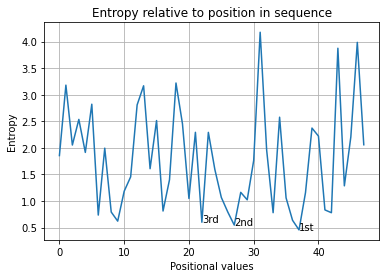

In [12]:
# PLEASE IGNORE THIS CELL, IT'S FOR TESTING PURPOSES
t = np.arange(0, 48, 1)
plt.plot(t,Si)

plt.xlabel('Positional values')
plt.ylabel('Entropy')
plt.title('Entropy relative to position in sequence')
plt.grid(True)

plt.annotate('1st', xy=(37,Si[37]))
plt.annotate('2nd', xy=(27,Si[27]))
plt.annotate('3rd', xy=(22,Si[22]))

plt.show()

In [13]:
#plot entropy
def plot_entropy(L,pos,Si):
    """
    For each of the L positions of the MSA, plot its entropy.
    
    BONUS : highlight the top-naa conserved sites, and print the
    most abundant amino acid type on top of the naa identified positions
    """
    
    x_axis = np.arange(0, L, 1)   # length of a sequence
    plt.plot(x_axis,Si)
    
    plt.xlabel('Positional values')
    plt.ylabel('Entropy')
    plt.title('Entropy relative to position in sequence')
    plt.grid(True)

    plt.annotate('1st', xy=(pos[0],Si[pos[0]]))
    plt.annotate('2nd', xy=(pos[1],Si[pos[1]]))
    plt.annotate('3rd', xy=(pos[2],Si[pos[2]]))
    plt.show()
    
    plt.savefig('entropy.png', dpi=300)
    return

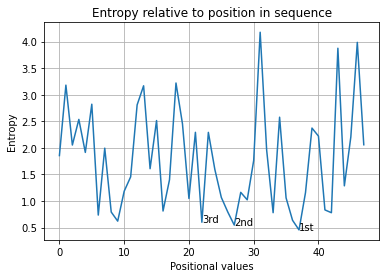

<Figure size 432x288 with 0 Axes>

In [14]:
likely_aas, positional_values = get_aiStart(Si, PWM, 3,aa)
plot_entropy(L,positional_values,Si)

Exercise 3: Déterminer les paramètres f(0)(b) du modèle nul, où
\begin{equation}
f^{(0)}(b) = \frac 1L \sum_{i=0}^{L-1} \omega_i(b)\ ,
\end{equation}

In [15]:
#computing f0
def f0_calcule(PWM):
    """
    Input 1 : position-weight matrix of shape (q,L)
    Output 1 : vector of size q containing the null model 
    """
    
    f_0 = []
    for i in range(q):
        f_0.append(np.sum(PWM[i])/L)
    
    return f_0

f_0 = f0_calcule(PWM)
print(f_0)

[0.0588070856873823, 0.007510887476459511, 0.08008915960451977, 0.0849149599811676, 0.041942531779661014, 0.0904800788606403, 0.012682438794726929, 0.050490672080979286, 0.05113803554613936, 0.07445047669491525, 0.01191369467984934, 0.03564545080037665, 0.03793329213747646, 0.034310263653484, 0.045061646657250466, 0.048438235640301315, 0.040725047080979286, 0.059160193032015064, 0.0365981049905838, 0.0385549081920904, 0.059152836629001886]


Exercise 4: (à appliquer à testseq.txt): Déterminer l(bi,...,bi+L−1)  pour chaque sous-séquence de longueur L. 
Déterminer si il y a des sous-séquences de la famille definie par Dtrain. 
Tracer la log-vraisemblance en fonction de sa première position i = 0, ..., N − L.
\begin{equation}
\label{eq:ll}
\ell(b_0,...,b_{L-1}) = \log_2 \frac {P(b_0,...,b_{L-1} | \omega )
}{P^{(0)}(b_0,...,b_{L-1})}
= \sum_{i=0}^{L-1} \log_2 \frac {\omega_i(b_i)}{f^{(0)}(b_i)}\ .
\end{equation}

4.1: Faites une fonction pour calculer la log-vraisemblance, d'une séquence de taille L.

In [16]:
#computing log-likehood
def loglikehood(seq, PWM, f_0, L):
    """
    Input 1 : sequence of which you want to calculate the log-likelihood
    Input 2 : position-weight matrix of shape (q,L)
    Input 3 : null model vector of length q
    Input 4 : MSA length
    Output 1 : log-likelihood of the sequence seq
    """
    
    ll=0
    for i in range(L-1):
        #ll += np.log2(PWM[aa.index(seq[i])][i]/f_0[aa.index(seq[i])])
        ll += math.log(PWM[aa.index(seq[i])][i]/f_0[aa.index(seq[i])],2)
    
    return ll

# Test the log-likelihood on the sequences of the data set

seq = "-ALYDCEAENSDELTFNRGEIIQLIDRPDNDWWEGFIQSDSRRGMFPV"
loglikehood(seq, PWM, f_0, L)

88.06296889040306

4.2: Faites une fonction qui etant donné une séquence de taille supérieur à k génère toutes les sous-séquences de taille k. Avec cette fonction, trouvez toutes les sous-séquences de taille L de la séquence en testseq.txt

In [17]:
#computing sliding_window 
def sliding_window (seq, k):
    """
    Input 1 : sequence of length > k
    Input 2 : window length (int)
    Output 1 : list of windows of length k generated from sequence seq
    """
    
    windows = []
    for i in range(len(seq)-k+1):
        windows.append(seq[i:i+k])
    return windows

# Find all subsequences of length L from the sequence in testseq.txt

print(sliding_window(test_set[0],L))

['PPAAAPQPKEPRYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLA', 'PAAAPQPKEPRYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLAS', 'AAAPQPKEPRYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASR', 'AAPQPKEPRYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRL', 'APQPKEPRYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRLD', 'PQPKEPRYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRLDK', 'QPKEPRYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRLDKS', 'PKEPRYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRLDKSA', 'KEPRYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRLDKSAS', 'EPRYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRLDKSASG', 'PRYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRLDKSASGW', 'RYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRLDKSASGWA', 'YKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRLDKSASGWAP', 'KALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRLDKSASGWAPS', 'ALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRLDKSASGWAPSA', 'LYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRLDKSASGWAPSAY', 'YDFAGQSAGELSLGKDEIILVTQKENNGWWLASRLDKSASGWAPSAYL', 'DFAGQSAGELSLGKDEIILVTQKENNGWWLASRLDKSASGWAPSAYLE', 'FAGQSAGELSLGKDEIILVTQKENNGWWLASRLDKSASGWAPSAYLEE', 'AGQSAGELSL

4.3: Calculer la log-vraisemblance pour toutes les sous-sequences trouvées en 4.2 et tracer un graphique de log-vraisemblance, avec en abscisse la position initiale de la sous-sequence.

In [29]:
#computing log-likelihood
def likelihoodAllSousSeq(subseqs, PWM, f_0, k):
    """
    Input 1 : list of all subsequences of length k
    Input 2 : position-weight matrix of length shape (q,k)
    Input 3 : null model vector of length k
    Input 4 : length of each subsequence
    Output 1 : log-likelihood vector of length len(subseqs) - k + 1
    
    REMARK : The length of the subsequences must match the
    number of columns in the PWM and the length of the null model!
    """
    
    lhs=[]
    for i in subseqs:
        lhs.append(loglikehood(i, PWM, f_0, k))
    
    return lhs


def plot_likelihood(lhs):
    """Input 1 : log-likelihood vector"""
    plt.plot([i for i in range(len(lhs))],lhs)
    
    plt.xlabel('Sub-sequence start value')
    plt.ylabel('Log likelihood value')
    plt.title('Log likelihood for every sub-sequence')
    plt.grid(True)
    
    plt.show()
    plt.savefig('likelihood.png', dpi=300)

    return

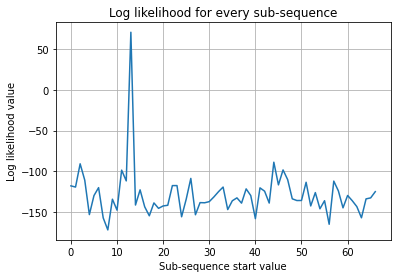

<Figure size 432x288 with 0 Axes>

In [30]:
#plotting log-likelihood for each initial position
subseqs=sliding_window(test_set[0], L)
lhs=likelihoodAllSousSeq(subseqs, PWM, f_0, L)
plot_likelihood(lhs)